## Importing Libraries

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## Basic Global Thresholding

Iteration 1, Threshold(T): 120
Iteration 2, Threshold(T): 140.3783907902535
Iteration 3, Threshold(T): 149.9532960418398
Iteration 4, Threshold(T): 155.40518320184435
Iteration 5, Threshold(T): 157.84577435575557
Iteration 6, Threshold(T): 159.66631384892116
Iteration 7, Threshold(T): 160.33620162701897
Iteration 8, Threshold(T): 160.75371472519058


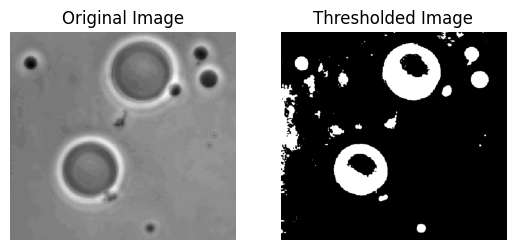

In [45]:
# loading the image
polymersomes = cv2.imread('polymersomes.tif')
polymersomes = cv2.cvtColor(polymersomes, cv2.COLOR_BGR2GRAY)

# initial estimate for the global threshold T
T = int(np.amax(polymersomes) / 2)
delta_T = 0

# global thresholding function
def globalThresholding(image, T, iterations = 1):
  # keeping track of iterations and threshold value
  print(f"Iteration {iterations}, Threshold(T): {T}")

  # allocating memory for storing pixels above and below the threshold
  m1 = []
  m2 = []

  # allocating memory for final image
  thresholded_image = np.zeros((image.shape[0], image.shape[1]))

  # segmenting the image
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i, j] > T:
        m1.append(image[i, j])
        thresholded_image[i, j] = 0
      else:
        m2.append(image[i, j])
        thresholded_image[i, j] = 1

  # computing new threshold
  T_new = 0.5 * (np.mean(m1) + np.mean(m2))

  # computing delta_T
  delta_T = T_new - T
  # exit condition
  if delta_T != 0:
    iterations += 1
    return globalThresholding(image, T_new, iterations)

  return thresholded_image

# calling the function
thresholded_fingerprint = globalThresholding(polymersomes, T)

# plotting the results
plt.subplot(1, 2, 1); plt.axis('off'); plt.title('Original Image'); plt.imshow(polymersomes, 'gray')
plt.subplot(1, 2, 2); plt.axis('off'); plt.title('Thresholded Image'); plt.imshow(thresholded_fingerprint, 'gray')

## Optimum Global Thresholding using Otsu's Method

Optimum Threshold: 181
Optimum Separability: 78326.48590710365


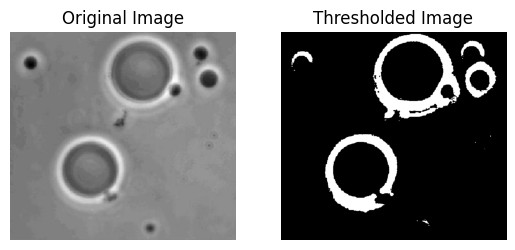

In [74]:
# loading the image
polymersomes = cv2.imread('polymersomes.tif')
polymersomes = cv2.cvtColor(polymersomes, cv2.COLOR_BGR2GRAY)

def globalThresholdingOtsu(image, L = 256):

  # normalized histogram
  histogram = [0] * L
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      histogram[image[i, j]] += 1

  normalized_histogram = [x / (image.shape[0] * image.shape[1]) for x in histogram]

  # initial threshold
  k = 182

  # class probability
  P1 = [0] * int(k)

  # mean intensity value of pixel in c1
  m1 = [0] * int(k)

  # global mean
  mG = 0

  # computing cumulative sums and means
  for i in range(k):
    P1[i] = sum(normalized_histogram[0:i])
    m1[i] = P1[i] / (i + 1)
    mG += i * normalized_histogram[i]

  # class variance term
  sigmaB = [0] * k
  for i in range(k):
    if P1[i] == 0:
      sigmaB[i] = 0
    else:
      sigmaB[i] = ((mG * P1[i] - m1[i])**2) / (P1[i] * (1 - P1[i]))

  # finding the optimum threshold value
  k_optimum = int(sigmaB.index(max(sigmaB)))
  print(f"Optimum Threshold: {k_optimum}")

  # global variance
  sigmaG = 0
  for i in range(L):
    sigmaG += ((i - mG)**2)*normalized_histogram[i]

  # separating measure
  eta = [0] * k
  for i in range(len(eta)):
    eta[i] = (sigmaB[i]**2) / (sigmaG ** 2)
  optimum_separability = eta[k_optimum]
  print(f"Optimum Separability: {optimum_separability}")

  # allocating memory for final image
  thresholded_image = np.zeros((image.shape[0], image.shape[1]))

  # segmenting the image
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i, j] > k_optimum:
        thresholded_image[i, j] = 1
      else:
        thresholded_image[i, j] = 0

  return thresholded_image

# calling the function
thresholded_fingerprint_otsu = globalThresholdingOtsu(polymersomes)

# plotting the results
plt.subplot(1, 2, 1); plt.axis('off'); plt.title('Original Image'); plt.imshow(polymersomes, 'gray')
plt.subplot(1, 2, 2); plt.axis('off'); plt.title('Thresholded Image'); plt.imshow(thresholded_fingerprint_otsu, 'gray')